# Nearest Neighbor Controller

In [1]:
import numpy as np
import matplotlib as mpl
from MPCNet.dataset import dataset
from MPCNet.controller import neighbor_controller, utils
from MPCNet.simulation import simulation
mpl.rcParams['figure.figsize'] = [10, 10]

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
X_raw,y = dataset.Dataset.load('data5-3000.csv')

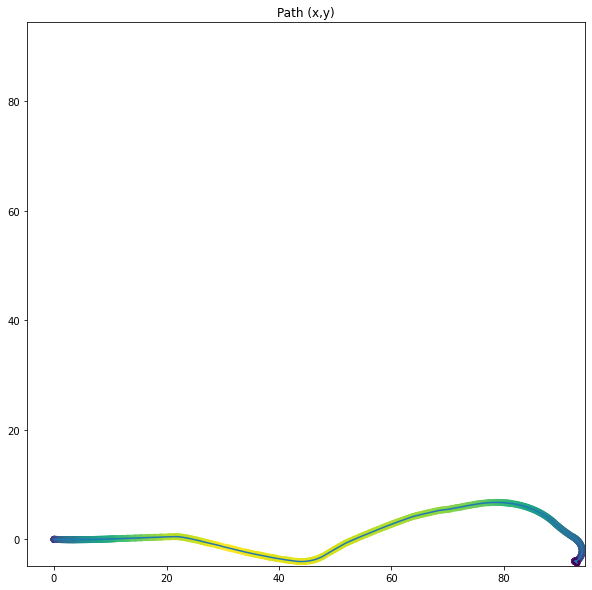

In [4]:
controllerClass = neighbor_controller.NeighborController(X_raw, y)
targetState = np.array([100, 0, 0, 0])

def controller(initState, targetState):
    return controllerClass.getControl(initState.T, targetState.T)

sim = simulation.Simulation(
    np.array([0.0, 0.0, 0.0, 0.0]),
    targetState,
    10.0,
    controller)

sim.runSimulation(30.0, quiet=True)
simulation.plot_path(sim)

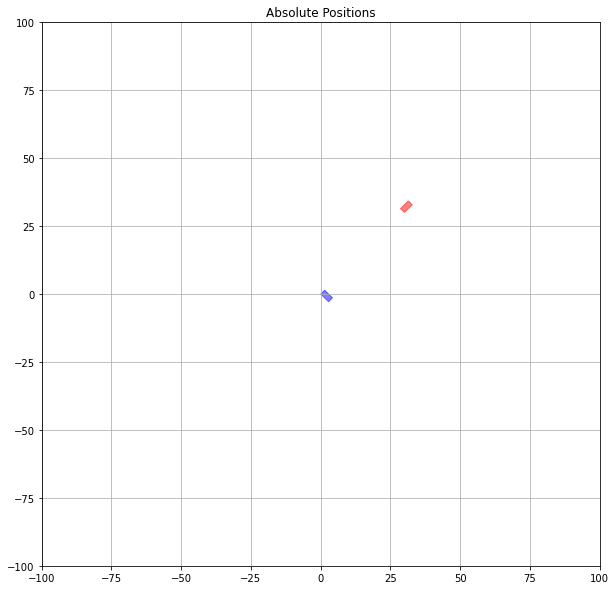

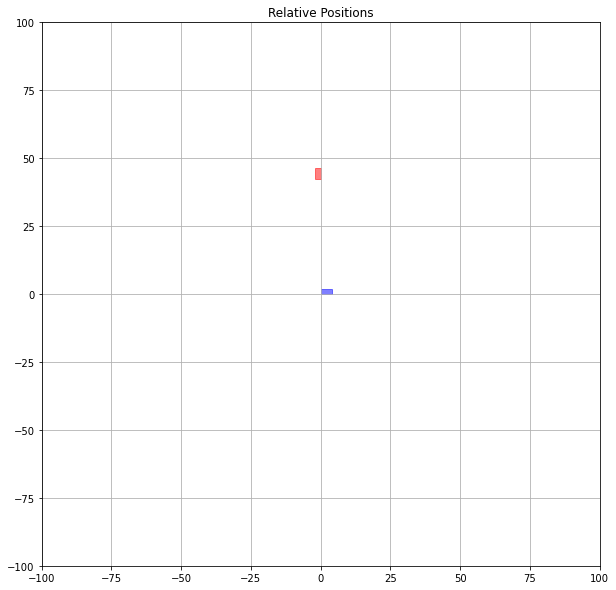

In [6]:
init = np.array([0, 0, 0, -np.pi/4])
final = np.array([30, 30, 10, np.pi/4])
initRelative, finalRelative = utils.absoluteToRelative(init, final)
utils.plotAbsolute(init, final)
utils.plotRelative(initRelative, finalRelative)